In [13]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%matplotlib inline

## 1

In [2]:
cvx.__version__

'1.0.10'

In [10]:
## 1
v = np.random.randn(10,2)

A = cvx.Variable((2, 2), PSD = True)
b = cvx.Variable((2,))

# cons = []
# for i in range(10):
#     cons.append(cvx.norm(A*x[:, i] + b, 2) <= 1)
    
cons = [cvx.norm(A*v[i] + b, 2) <= 1 for i in range(10)]

obj = cvx.Minimize(-cvx.log_det(A))
problem = cvx.Problem(obj, cons)
problem.solve(solver = cvx.CVXOPT) 

print('A', A.value)
print( 'b', b.value)
a1 = A.value
b1 = b.value

c = np.linalg.inv(a1).dot(b1)
Q = a1.dot(a1)
print()
print('Q:', Q)
print('c:', c)

A [[ 0.3406953  -0.03067362]
 [-0.03067362  0.53631258]]
b [0.01511165 0.42282418]

Q: [[ 0.11701416 -0.02690101]
 [-0.02690101  0.28857205]]
c: [0.11593308 0.79502193]


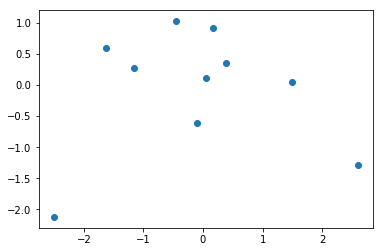

In [23]:
fig, ax = plt.subplots()
plt.scatter(v[:, 0], v[:, 1])
e = Ellipse(c, 5, 5, angle=80,alpha = .1)
# ax.add_artist(e)